In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.stats import rv_continuous

1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

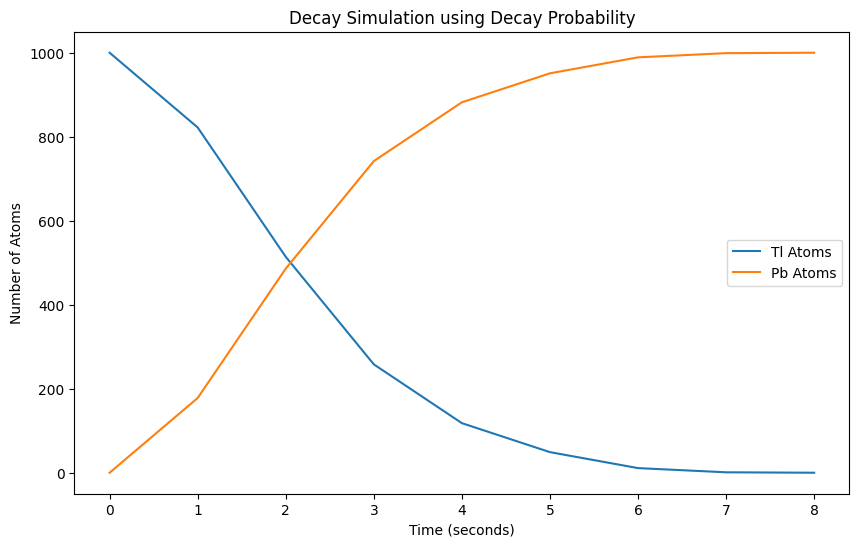

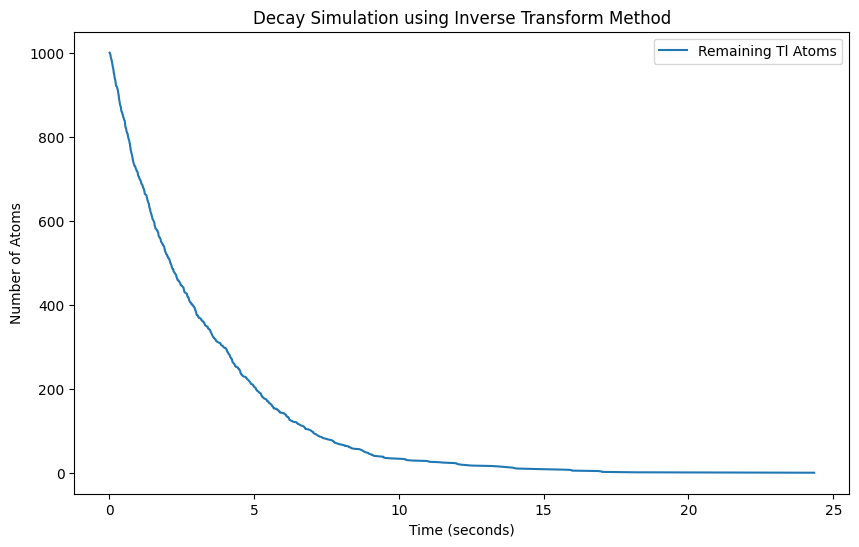

In [9]:
initial_Tl_atoms = 1000
initial_Pb_atoms = 0
half_life = 3.052  #minutes
time_step = 1  #seconds

def decay_probability(t, tau):
    return 1 - 2**(-t/tau)

def simulate_decay_prob(initial_Tl, initial_Pb, tau, time_step):
    Tl_atoms = [initial_Tl]
    Pb_atoms = [initial_Pb]

    t = 0
    while Tl_atoms[-1] > 0:
        t += time_step
        decay_prob = decay_probability(t, tau)

        decayed_atoms = np.random.rand(Tl_atoms[-1]) < decay_prob
        
        Tl_atoms.append(Tl_atoms[-1] - np.sum(decayed_atoms))
        Pb_atoms.append(Pb_atoms[-1] + np.sum(decayed_atoms))

    return np.arange(0, t + time_step, time_step), Tl_atoms, Pb_atoms

time_points_prob, Tl_atoms_prob, Pb_atoms_prob = simulate_decay_prob(initial_Tl_atoms, initial_Pb_atoms, half_life, time_step)

plt.figure(figsize=(10, 6))
plt.plot(time_points_prob, Tl_atoms_prob, label='Tl Atoms')
plt.plot(time_points_prob, Pb_atoms_prob, label='Pb Atoms')
plt.xlabel('Time (seconds)')
plt.ylabel('Number of Atoms')
plt.title('Decay Simulation using Decay Probability')
plt.legend()
plt.show()

#Inverse transform method
def simulate_inverse_transform(initial_Tl, tau, num_atoms):
    decay_times = -tau * np.log(1 - np.random.rand(num_atoms))

    # Sort the decay times
    decay_times.sort()

    Tl_atoms = [initial_Tl]
    Pb_atoms = [0]

    for decay_time in decay_times:
        Tl_atoms.append(Tl_atoms[-1] - 1)
        Pb_atoms.append(Pb_atoms[-1] + 1)

    return decay_times, Tl_atoms[:-1], Pb_atoms[:-1]

decay_times_inv_transform, Tl_atoms_inv_transform, Pb_atoms_inv_transform = simulate_inverse_transform(initial_Tl_atoms, half_life, initial_Tl_atoms)


plt.figure(figsize=(10, 6))
plt.plot(decay_times_inv_transform, Tl_atoms_inv_transform, label='Remaining Tl Atoms')
plt.xlabel('Time (seconds)')
plt.ylabel('Number of Atoms')
plt.title('Decay Simulation using Inverse Transform Method')
plt.legend()
plt.show()


2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

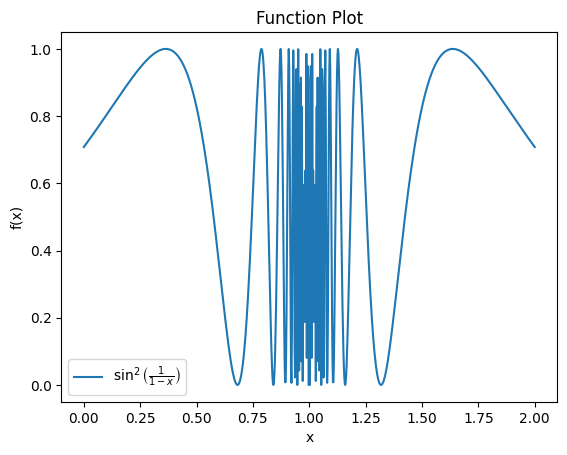

Hit/Miss Method Integral Estimate: 1.3296
Mean Value Method Integral Estimate: 1.3431161541032637

Error (Hit/Miss Method): 0.006545801464058944
Error (Mean Value Method): 0.006545801464058944


In [10]:
def f(x):
    return np.sin(1 / (1 - x))**2

#Integration interval
a, b = 0, 2


x_values = np.linspace(a, b, 1000)
plt.plot(x_values, f(x_values), label=r'$\sin^2\left(\frac{1}{1-x}\right)$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Function Plot')
plt.legend()
plt.show()

#Number of random points for Monte Carlo integration
N = 10000

#Hit/Miss method
random_x = np.random.uniform(a, b, N)
random_y = np.random.uniform(0, 1, N)

integral_values = f(random_x)
hits = random_y < integral_values

integral_estimate_hit_miss = (hits.sum() / N) * (b - a)

mean_value_estimate = np.mean(integral_values) * (b - a)

error_hit_miss = np.std(integral_values) * (b - a) / np.sqrt(N)
error_mean_value = np.std(integral_values) * (b - a) / np.sqrt(N)

print(f"Hit/Miss Method Integral Estimate: {integral_estimate_hit_miss}")
print(f"Mean Value Method Integral Estimate: {mean_value_estimate}")

print(f"\nError (Hit/Miss Method): {error_hit_miss}")
print(f"Error (Mean Value Method): {error_mean_value}")


3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [13]:
def monte_carlo_circle(num_points):
    points = np.random.rand(num_points, 2) * 2 - 1  # Random points in the [-1, 1] range
    inside_circle = np.sum(points[:, 0]**2 + points[:, 1]**2 <= 1)
    area_estimate = inside_circle / num_points * 4  # Multiply by 4 to estimate the whole circle area
    return area_estimate

def monte_carlo_sphere(num_points, dimensions):
    points = np.random.rand(num_points, dimensions) * 2 - 1  # Random points in the [-1, 1] range for each dimension
    inside_sphere = np.sum(np.sum(points**2, axis=1) <= 1)
    volume_estimate = inside_sphere / num_points * (2**dimensions)  # Multiply by (2^d) to estimate the whole sphere volume
    return volume_estimate

num_points_circle = 100000
area_estimate_circle = monte_carlo_circle(num_points_circle)
print(f"Estimated area of the unit circle in 2D: {area_estimate_circle}")

num_points_sphere = 100000
dimensions_sphere = 10
volume_estimate_sphere = monte_carlo_sphere(num_points_sphere, dimensions_sphere)
print(f"Estimated volume of the unit sphere in 10D: {volume_estimate_sphere}")


Estimated area of the unit circle in 2D: 3.14828
Estimated volume of the unit sphere in 10D: 2.87744


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

Importance Sampling Estimate: 0.8389495835469646
True Value of the Integral: 0.84


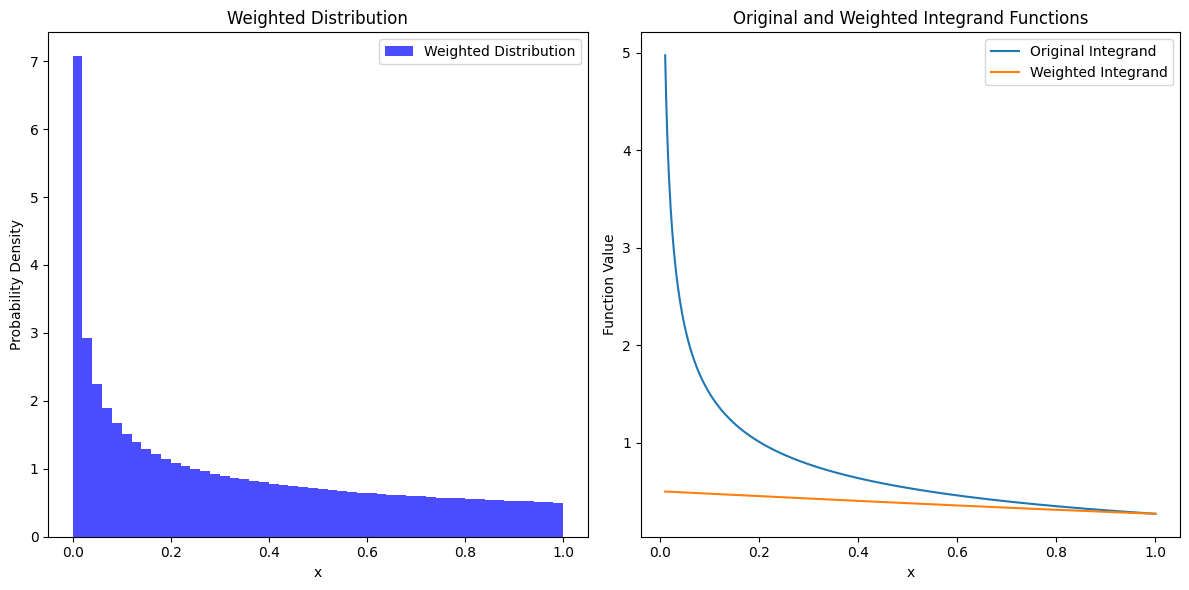

In [11]:
def weight_function(x):
    return 1 / np.sqrt(x)

def integrand(x):
    return x**(-1/2) / (np.exp(x) + 1)

def weighted_integrand(x):
    return integrand(x) / weight_function(x)

#Number of samples
N = 100000000

samples = np.random.power(0.5, N)

integral_estimate = np.mean(weighted_integrand(samples)) / np.mean(1 / weight_function(samples))

true_value = 0.84

print(f"Importance Sampling Estimate: {integral_estimate}")
print(f"True Value of the Integral: {true_value}")

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(samples, bins=50, density=True, alpha=0.7, color='blue', label='Weighted Distribution')
plt.title('Weighted Distribution')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()

x_values = np.linspace(0.01, 1, 1000)
plt.subplot(1, 2, 2)
plt.plot(x_values, integrand(x_values), label='Original Integrand')
plt.plot(x_values, weighted_integrand(x_values), label='Weighted Integrand')
plt.title('Original and Weighted Integrand Functions')
plt.xlabel('x')
plt.ylabel('Function Value')
plt.legend()

plt.tight_layout()
plt.show()
